In [ ]:
import scipy.io
import os
import numpy as np
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
SUBJECTS_FOLDER = '/content/drive/MyDrive/Social memory cuing full dataset/derivatives/EEGPreprocessedDataTableStudy'
#SUBJECTS_FOLDER = '/content/drive/MyDrive/Tirocinio/Datasets/Social memory cuing full dataset/derivatives/EEGPreprocessedDataTableStudy'#Vale
SINGLE_SUBJECT = os.path.join(SUBJECTS_FOLDER, "sub-03/ProcessedData/data_ica.mat")
SUBJECTS = [ name for name in os.listdir(SUBJECTS_FOLDER) if os.path.isdir(os.path.join(SUBJECTS_FOLDER, name)) ]
DATA = "ProcessedData/data_ica.mat"

In [ ]:
SUBJECTS.sort()
print(SUBJECTS)

['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-09', 'sub-10', 'sub-11', 'sub-12', 'sub-13', 'sub-14', 'sub-15', 'sub-16', 'sub-17', 'sub-18', 'sub-19', 'sub-20', 'sub-21', 'sub-22', 'sub-23', 'sub-24', 'sub-25', 'sub-26', 'sub-27', 'sub-28', 'sub-29', 'sub-30', 'sub-31', 'sub-32', 'sub-33', 'sub-34', 'sub-35', 'sub-36', 'sub-37', 'sub-38', 'sub-39', 'sub-40', 'sub-41', 'sub-43', 'sub-44', 'sub-45', 'sub-46', 'sub-48', 'sub-49', 'sub-50']


In [ ]:
#soggetti con meno trials
print(SUBJECTS[1])  #196
print(SUBJECTS[6])  #176
print(SUBJECTS[34]) #171

sub-02
sub-07
sub-36


# Trials encoding window retrieval and save

In [ ]:
for i in range(0, len(SUBJECTS), 1):
  print(i)
  mat = scipy.io.loadmat(os.path.join(os.path.join(SUBJECTS_FOLDER, SUBJECTS[i]), DATA))['trial']
  first =  np.expand_dims(mat[0, 0][:, 1750:2000], axis = 0)
  if i != 0:
    subjects_encoding = np.vstack([subjects_encoding, first])
  else:
    subjects_encoding = first
  for j in range(1, np.shape(mat)[1], 1):
    subjects_encoding = np.vstack([subjects_encoding, np.expand_dims(mat[0, j][:, 1750:2000], axis = 0)])

print(np.shape(subjects_encoding))

In [ ]:
#with open('/content/drive/MyDrive/subjects_encoding.pkl', 'wb') as f:
with open('/content/drive/MyDrive/Tirocinio/Datasets/subjects_encoding.pkl', 'wb') as f: #Vale
  pickle.dump(subjects_encoding, f)

In [ ]:
with open('/content/drive/MyDrive/subjects_encoding.pkl', 'rb') as f:
#with open('/content/drive/MyDrive/Tesi/data/subjects_encoding.pkl', 'rb') as f: 
#with open('/content/drive/MyDrive/Tirocinio/Datasets/subjects_encoding.pkl', 'rb') as f: #Vale
  subjects_encoding = pickle.load(f)

# Trials info retrieval and save

In [ ]:
subjects = []

for i in range(len(SUBJECTS)):
  mat = scipy.io.loadmat(os.path.join(os.path.join(SUBJECTS_FOLDER, SUBJECTS[i]), DATA))
  subjects.append(mat['trialinfo'])

print(np.shape(subjects))

# Creazione Matrice Matlab

In [ ]:
print(SUBJECTS)

In [ ]:
sub2trial2info = []

for i in range(len(SUBJECTS)):
  print(i)
  trial2info = []
  mat = scipy.io.loadmat(os.path.join(os.path.join(SUBJECTS_FOLDER, SUBJECTS[i]), DATA))['trialinfo']
  for j in range(np.shape(mat)[0]):
    trial2info.append([mat[j, 0], mat[j, 9]- 500, mat[j, 9]])

  sub2trial2info.append(trial2info)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


In [ ]:
sub2trial2info = app 

In [ ]:
np.shape(app[0])

(224, 3)

In [ ]:
app = sub2trial2info.copy()
print(np.shape(sub2trial2info))
sub2trial2info.pop(1)
sub2trial2info.pop(5)
sub2trial2info.pop(32)

sub2trial2info = np.transpose(sub2trial2info, [1, 2, 0])
print(np.shape(sub2trial2info))

(47,)
(224, 3, 44)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
#with open('/content/drive/MyDrive/trial2info2sub.pkl', 'wb') as f:
with open('/content/drive/MyDrive/Tirocinio/Datasets/Ciao/subjects_encoding.pkl', 'wb') as f: #Vale
  pickle.dump(sub2trial2info, f)

In [ ]:
with open('/content/drive/MyDrive/trial2info2sub.pkl', 'rb') as f:
  sub2trial2info = pickle.load(f)

In [ ]:
from scipy.io import savemat
#savemat('/content/drive/MyDrive/trial2info2sub.mat', {'vec':sub2trial2info})
savemat('/content/drive/MyDrive/Tirocinio/Datasets/Ciao/trial2info2sub.mat', {'vec':sub2trial2info}) #Vale

In [ ]:
for i in range(len(sub2trial2info)):
  print(len(sub2trial2info[i]))

# Prove

In [ ]:
7175 - (subjects[1][0, 12] - subjects[1][0, 7])  - 985

-2

In [ ]:
np.shape(subjects[8])

In [ ]:
print(subjects[1][:, 13])

[  76928   83007   89070   96270  103108  109745  115114  122021  128663
  134663  140445  146451  152207  158501  164008  169814  176158  184433
  190864  198895  204408  209619  215558  221350  227594  233901  239652
  245358  256203  262114  267519  274863  281713  287444  293438  298777
  304182  309607  314870  321019  327526  332400  338050  343957  349314
  354776  360432  365726  370988  376257  381876  388088  394044  402370
  407683  413901  427340  433600  439168  445181  450494  455592  460826
  466931  472174  477475  483038  488562  493906  499426  504426  509632
  515675  521274  526607  531663  537562  543043  548144  553425  559207
  565275  570457  575588  586684  592756  599082  604894  610780  616636
  623044  628343  633962  639642  645112  650112  656243  661530  666680
  672793  678693  684062  689450  694580  700338  705636  711061  716869
  722194  728663  733794  739105  953301  958255  963537  969169  974744
  980375  985706  991025  997486 1002424 1007474 10

In [ ]:
subjects[2][:, 14] - subjects[2][:, 13]

array([ 504, 1387,  875,  812,  680,  980,  954,  706,  563,  870,  563,
       1001, 1362,  850,  650,  707,  414, 1006, 1651,  417,  505, 1157,
        881,  536,  608, 1143,  637,  819,  331,  844,  831,  957, 1863,
        601,  837,  706, 1325, 1038,  564,  632,  950,  968,  774,  962,
       2488,  780, 1237,  968,  843,  655,  837,  670,  957, 1657, 1150,
        655, 1019, 1626,  643, 1275, 1107,  700,  627,  555, 1275,  618,
       1125, 1068,  693,  888,  799,  676, 1032,  794,  768,  880,  700,
        735, 1030,  894, 1624, 1851,  711,  237,  469, 1032,  626,  719,
        663, 4193, 1150,  692,  499, 1062,  582,  924,  580, 1611, 1818,
        767,  711,  851,  882,  599,  756,  775,  618, 1100,  451,  617,
       1057,  588,  880,  486,  456,  555,  937,  706,  631,  511,  974,
       1025,  988,  638, 1376,  850, 1636, 1556, 1119, 1394,  657,  794,
       1274, 2313, 1733, 1731,  624,  599,  849,  913, 1681,  908, 1018,
        480, 1213,  606,  442,  764, 1155,  551,  6

In [ ]:
subjects[1][:, 14] - subjects[1][:, 13]

array([504, 506, 500, 499, 504, 500, 507, 505, 500, 501, 505, 500, 501,
       506, 506, 499, 505, 499, 499, 500, 505, 508, 505, 507, 507, 507,
       500, 500, 503, 505, 506, 500, 500, 500, 505, 499, 500, 499, 500,
       500, 500, 507, 500, 500, 504, 500, 499, 500, 505, 500, 499, 507,
       501, 500, 505, 500, 503, 507, 507, 501, 500, 501, 505, 501, 508,
       507, 500, 501, 506, 505, 505, 505, 501, 501, 499, 500, 507, 500,
       507, 506, 500, 501, 506, 500, 503, 501, 500, 499, 501, 508, 500,
       507, 500, 501, 506, 500, 501, 501, 500, 507, 506, 505, 506, 501,
       506, 502, 507, 505, 500, 505, 506, 506, 504, 500, 506, 500, 499,
       499, 505, 499, 501, 500, 507, 499, 506, 505, 506, 501, 500, 505,
       501, 500, 505, 500, 506, 505, 499, 506, 499, 506, 505, 508, 506,
       506, 507, 502, 500, 506, 507, 506, 506, 500, 500, 502, 507, 508,
       506, 506, 499, 506, 500, 500, 504, 500, 501, 507, 501, 501, 506,
       506, 506, 505, 501, 506, 506, 501, 506, 506, 500, 507, 50

# Stats

In [ ]:
with open('/content/drive/MyDrive/subjects.pkl', 'wb') as f:
  pickle.dump(subjects, f)

In [ ]:
with open('/content/drive/MyDrive/subjects.pkl', 'rb') as f:
#with open('/content/drive/MyDrive/Tesi/data/subjects.pkl', 'rb') as f:
#with open('/content/drive/MyDrive/Tirocinio/Datasets/subjects_encoding.pkl', 'rb') as f:
  subjects = pickle.load(f)

In [ ]:
print(subjects)

[array([[      2,       3,       6, ...,   50308,       1,       1],
       [      1,       2,       4, ...,   56084,       1,       1],
       [      2,       3,       5, ...,   62484,       1,       1],
       ...,
       [      4,       8,       7, ..., 1334719,       1,       0],
       [      4,       8,       8, ..., 1339563,       1,       1],
       [      3,       6,       4, ..., 1344544,       1,       1]],
      dtype=int32), array([[      4,       7,       5, ...,   77432,       1,       1],
       [      3,       5,       1, ...,   83513,       1,       1],
       [      3,       6,       4, ...,   89570,       1,       0],
       ...,
       [      1,       2,       3, ..., 1544565,       1,       1],
       [      1,       1,       2, ..., 1550060,       1,       1],
       [      1,       2,       4, ..., 1555179,       1,       1]],
      dtype=int32), array([[      4,       8,       8, ...,  129048,       1,       1],
       [      4,       7,       5, ...,  135856, 

In [ ]:
#trialinfo = mat['trialinfo']
#trialinfo_shape = np.shape(mat['trialinfo'])

sub2cond2trials = []
for i in subjects:
  #1 = Stick congruent, 2 = Stick incongruent, 3 = Avatar congruent, 4 = Avatar incongruent
  cond2trials = {'1': [], '2': [], '3': [], '4': []}
  for j in range(np.shape(i)[0]):  # iterating over trials
    cond2trials[str(i[j,0])].append(j)
  sub2cond2trials.append(cond2trials)

print(len(sub2cond2trials))

47


In [ ]:
def compute_reaction_time_stat(sub, trials):
  reaction_times = []
  for trial in trials:
    try:
      reaction_times.append(subjects[sub][trial+1, 7] - subjects[sub][trial, 12] - 1000)
    except:
      continue

  return reaction_times

In [ ]:
#stats: 0 = reaction time mean; 1 = reaction time std; 2 = accuracy 

sub2cond2stats = []
for i in range(len(sub2cond2trials)):
  cond2stats = []
  cond2trials = sub2cond2trials[i]
  for j in range(len(cond2trials.keys())):  #condizioni per paziente
    stats = []
    reaction_time_loc = subjects[i][cond2trials[str(j+1)], 12] - subjects[i][cond2trials[str(j+1)], 11]
    stats.append(np.mean(reaction_time_loc))
    stats.append(np.std(reaction_time_loc))

    #reaction_time_stat = subjects[i][[x+1 for x in cond2trials[str(j+1)]], 7] - subjects[i][cond2trials[str(j+1)], 14] - 1000
    reaction_time_stat = compute_reaction_time_stat(i, cond2trials[str(j+1)])
    stats.append(np.mean(reaction_time_stat))
    stats.append(np.std(reaction_time_stat))

    loc_accuracy = subjects[i][cond2trials[str(j+1)], 15]
    stats.append(np.mean(loc_accuracy))
    stats.append(np.std(loc_accuracy))

    status_accuracy = subjects[i][cond2trials[str(j+1)], 16]
    stats.append(np.mean(status_accuracy))
    stats.append(np.std(status_accuracy))
    cond2stats.append(stats)
  sub2cond2stats.append(cond2stats)

In [ ]:
print(subjects[0][0, 7])

45162


In [ ]:
print(sub2cond2stats[0][0])

[441.19642857142856, 98.64536402886735, 977.6964285714286, 1159.6605864223939, 0.8928571428571429, 0.30929478706587094, 0.6607142857142857, 0.47346691369867333]


## Reaction Times compared to accuracies

In [ ]:
soc_reaction_times_loc = []
non_soc_reaction_times_loc = []

soc_reaction_times_stat = []
non_soc_reaction_times_stat = []
sub2cond2stats = np.array(sub2cond2stats)

for sub in range(len(sub2cond2stats)):
  if sub == 1 or sub == 5 or sub == 32:
    continue
  for cond in range(0, 4, 2):
    if cond == 0:
      val = (sub2cond2stats[sub, cond, 0] + sub2cond2stats[sub, cond+1, 0])/2
      soc_reaction_times_loc.append(val) #Social loc
      val = (sub2cond2stats[sub, cond, 2] + sub2cond2stats[sub, cond+1, 2])/2
      soc_reaction_times_stat.append(val) #Social stat
    else:
      val = (sub2cond2stats[sub, cond, 0] + sub2cond2stats[sub, cond+1, 0])/2
      non_soc_reaction_times_loc.append(val) #Non social loc
      val = (sub2cond2stats[sub, cond, 2] + sub2cond2stats[sub, cond+1, 2])/2
      non_soc_reaction_times_stat.append(val) #Non social stat

with open('/content/drive/MyDrive/soc_reaction_times_loc.pkl', 'wb') as f:
  pickle.dump(np.array(soc_reaction_times_loc), f)

with open('/content/drive/MyDrive/non_soc_reaction_times_loc.pkl', 'wb') as f:
  pickle.dump(np.array(non_soc_reaction_times_loc), f)

with open('/content/drive/MyDrive/soc_reaction_times_stat.pkl', 'wb') as f:
  pickle.dump(np.array(soc_reaction_times_stat), f)

with open('/content/drive/MyDrive/non_soc_reaction_times_stat.pkl', 'wb') as f:
  pickle.dump(np.array(non_soc_reaction_times_stat), f)

In [ ]:
soc_acc_loc = []
non_soc_acc_loc = []

soc_acc_stat = []
non_soc_acc_stat = []
sub2cond2stats = np.array(sub2cond2stats)

for sub in range(len(sub2cond2stats)):
  if sub == 1 or sub == 5 or sub == 32:
    continue
  for cond in range(0, 4, 2):
    if cond == 0:
      val = (sub2cond2stats[sub, cond, 4] + sub2cond2stats[sub, cond+1, 0])/2
      soc_acc_loc.append(val) #Social loc
      val = (sub2cond2stats[sub, cond, 6] + sub2cond2stats[sub, cond+1, 2])/2
      soc_acc_stat.append(val) #Social stat
    else:
      val = (sub2cond2stats[sub, cond, 4] + sub2cond2stats[sub, cond+1, 0])/2
      non_soc_acc_loc.append(val) #Non social loc
      val = (sub2cond2stats[sub, cond, 6] + sub2cond2stats[sub, cond+1, 2])/2
      non_soc_acc_stat.append(val) #Non social stat

with open('/content/drive/MyDrive/soc_acc_loc.pkl', 'wb') as f:
  pickle.dump(np.array(soc_acc_loc), f)

with open('/content/drive/MyDrive/non_soc_acc_loc.pkl', 'wb') as f:
  pickle.dump(np.array(non_soc_acc_loc), f)

with open('/content/drive/MyDrive/soc_acc_stat.pkl', 'wb') as f:
  pickle.dump(np.array(soc_acc_stat), f)

with open('/content/drive/MyDrive/non_soc_acc_stat.pkl', 'wb') as f:
  pickle.dump(np.array(non_soc_acc_stat), f)

In [ ]:
reaction_time_loc = np.array(soc_reaction_times_loc) - np.array(non_soc_reaction_times_loc)
reaction_time_status =  np.array(soc_reaction_times_stat) -  np.array(non_soc_reaction_times_stat)

In [ ]:
accuracies = np.array([85.3,76.5,70.5,79.4,82.3,94.1,94.1,94.1,94.1,85.3,82.3,85.3,82.3,76.5, 91.1, 73.5,88.2,\
 88.2,88.2,82.3,82.3,88.2,85.3,82.3,94.1,97.0,70.5,76.5,82.3,79.4,82.3,97.0,79.4,85.3,\
 82.3,82.3,67.6,91.1,85.3,82.3,88.2,97.0,79.4,76.5])

In [ ]:
print(accuracies[0])
print(soc_reaction_times_loc[0])

85.3
442.4821428571429


In [ ]:
import matplotlib.pyplot as plt

#soc_reaction_times_loc_norm = ((soc_reaction_times_loc - min(soc_reaction_times_loc))/(max(soc_reaction_times_loc) - min(soc_reaction_times_loc)))*100

labels = range(44)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, soc_reaction_times_loc, width, label='soc_reaction_times_loc')
rects2 = ax.bar(x + width/2, accuracies, width, label='accuracies')

ax.set_xticks(x, labels)

plt.show()

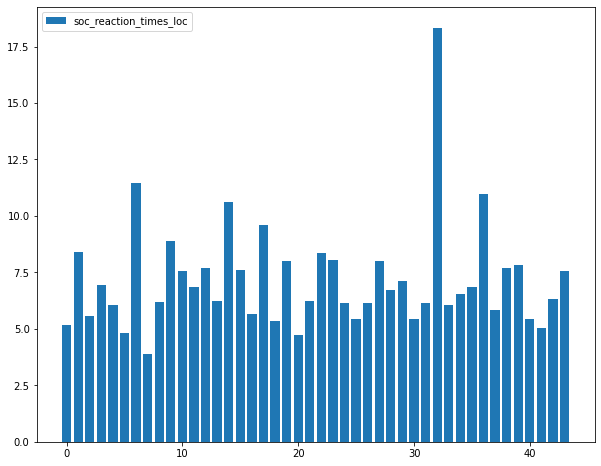

In [ ]:
import matplotlib.pyplot as plt

#soc_reaction_times_loc = ((soc_reaction_times_loc - min(soc_reaction_times_loc))/(max(soc_reaction_times_loc) - min(soc_reaction_times_loc)))*100

plt.figure(figsize=[10,8])
plt.bar(range(44), abs(soc_reaction_times_loc/accuracies), label='soc_reaction_times_loc')
#plt.bar(range(44), accuracies, label='accuracies')
plt.legend(loc='upper left')
plt.show()

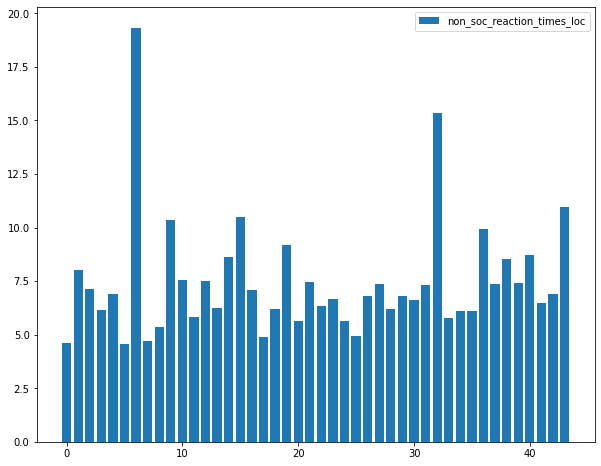

In [ ]:
plt.figure(figsize=[10,8])
plt.bar(range(44), abs(non_soc_reaction_times_loc/accuracies), label='non_soc_reaction_times_loc')
#plt.bar(range(44), accuracies, label='accuracies')
plt.legend(loc='upper right')
plt.show()

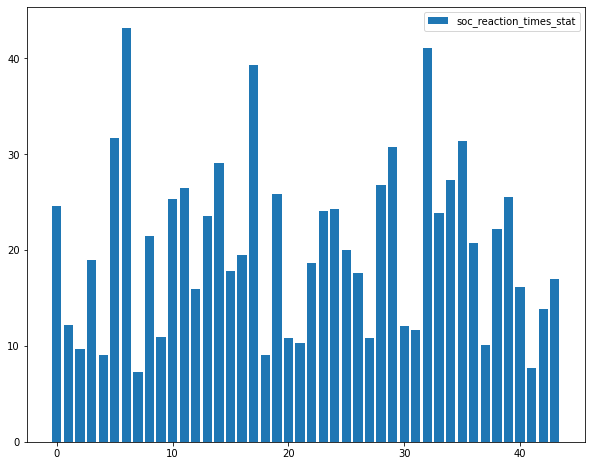

In [ ]:
plt.figure(figsize=[10,8])
plt.bar(range(44), abs(soc_reaction_times_stat/accuracies), label='soc_reaction_times_stat')
#plt.bar(range(44), accuracies, label='accuracies')
plt.legend(loc='upper right')
plt.show()

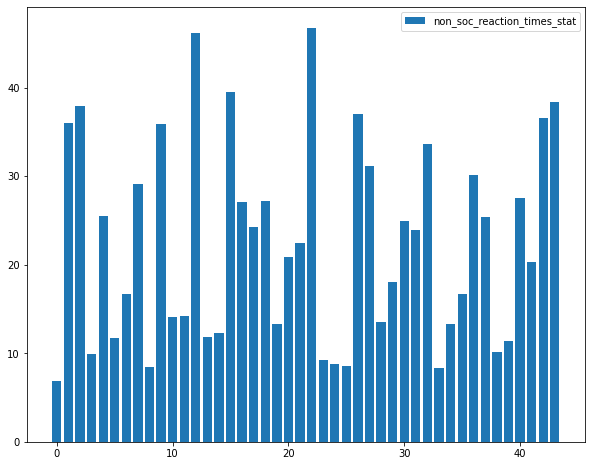

In [ ]:
plt.figure(figsize=[10,8])
plt.bar(range(44), abs(non_soc_reaction_times_stat/accuracies), label='non_soc_reaction_times_stat')
#plt.bar(range(44), accuracies, label='accuracies')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from scipy import stats

print(stats.ttest_ind(soc_reaction_times_loc, accuracies))
print(stats.ttest_ind(non_soc_reaction_times_loc, accuracies))
print(stats.ttest_ind(soc_reaction_times_stat, accuracies))
print(stats.ttest_ind(non_soc_reaction_times_stat, accuracies))

Ttest_indResult(statistic=17.735282716345605, pvalue=1.7956522866839518e-30)
Ttest_indResult(statistic=15.09123427052152, pvalue=6.788240852746967e-26)
Ttest_indResult(statistic=13.474122819219806, pvalue=6.610066193053599e-23)
Ttest_indResult(statistic=13.211458151633206, pvalue=2.0828751603342384e-22)


In [ ]:
from scipy.stats import pearsonr

corr, _ = pearsonr(soc_reaction_times_loc, accuracies)
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(non_soc_reaction_times_loc, accuracies)
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(soc_reaction_times_stat, accuracies)
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(non_soc_reaction_times_stat, accuracies)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.018
Pearsons correlation: 0.096
Pearsons correlation: 0.220
Pearsons correlation: -0.235


In [ ]:
corr, _ = pearsonr(reaction_time_loc, accuracies)
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(reaction_time_status, accuracies)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.116
Pearsons correlation: 0.266


In [ ]:
from scipy.stats import spearmanr

corr, _ = spearmanr(soc_reaction_times_loc, accuracies)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(non_soc_reaction_times_loc, accuracies)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(soc_reaction_times_stat, accuracies)
print('Pearsons correlation: %.3f' % corr)
corr, _ = spearmanr(non_soc_reaction_times_stat, accuracies)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.027
Pearsons correlation: -0.015
Pearsons correlation: 0.152
Pearsons correlation: -0.238


## Stats Plots

In [ ]:
cond2time = []
for i in range(4):
  cond2time.append(np.mean(np.array(sub2cond2stats)[:, i, 0]))

In [ ]:
print(cond2time)

[603.8859999904391, 600.0185477729327, 622.7419199594732, 639.1009520829607]


([<matplotlib.axis.XTick at 0x7f868bacae90>,
 [Text(0, 0, 'SC'), Text(0, 0, 'SI'), Text(0, 0, 'AC'), Text(0, 0, 'AI')])

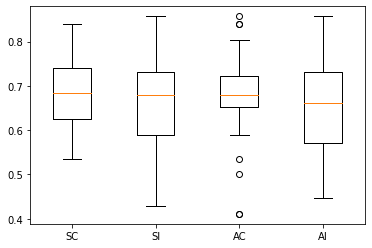

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(np.array(sub2cond2stats)[:, :, 6], notch=None, vert=None, patch_artist=None, widths=None)
plt.xticks([1, 2, 3, 4], ['SC', 'SI', 'AC', 'AI'])

In [ ]:
import seaborn as sns
import pandas as pd

tips = sns.load_dataset("tips")

condIdx2str = {0: 'stick cong', 1: 'stick inco', \
               2: 'avatar cong', 3: 'avatar inco'}

df = pd.DataFrame()
for sub_idx in range(len(sub2cond2stats)):
    for cond_idx in range(len(sub2cond2stats[sub_idx])):
        cond = list(sub2cond2stats[sub_idx][cond_idx])
        cond.insert(0, condIdx2str[cond_idx])
        df = df.append(pd.Series(cond), ignore_index=True)

df = df.rename(columns={0:'condition', 1:'time_location_mean', 2:'time_location_std', \
                           3:'time_status_mean', 4:'time_status_std', \
                           5:'accuracy_location_mean', 6:'accuracy_location_std', \
                           7:'accuracy_status_mean', 8:'accuracy_status_std'})


In [ ]:
df.head()

,condition,time_location_mean,time_location_std,time_status_mean,time_status_std,accuracy_location_mean,accuracy_location_std,accuracy_status_mean,accuracy_status_std
0,stick cong,441.196429,98.645364,977.696429,1159.660586,0.892857,0.309295,0.660714,0.473467
1,stick inco,443.767857,83.814845,3220.267857,19011.766269,0.946429,0.225170,0.785714,0.410326
2,avatar cong,413.053571,86.832026,523.727273,119.259908,0.928571,0.257539,0.678571,0.467025
3,avatar inco,375.660714,72.354355,646.625000,594.781850,0.982143,0.132432,0.571429,0.494872
4,stick cong,436.732143,180.728041,913.218182,508.794393,0.946429,0.225170,0.571429,0.494872


In [ ]:
stat_to_display = 'accuracy_status_mean'

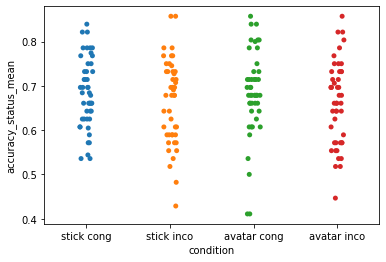

In [ ]:
ax = sns.stripplot(x='condition', y=stat_to_display, data=df, jitter=0.08)

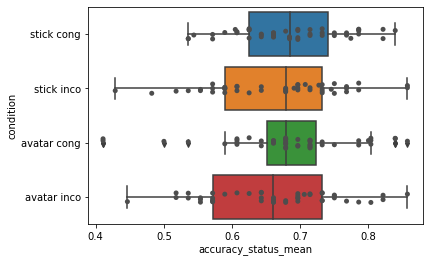

In [ ]:
ax = sns.boxplot(y="condition", x=stat_to_display, data=df)
ax = sns.stripplot(y='condition', x=stat_to_display, data=df, color='.3')

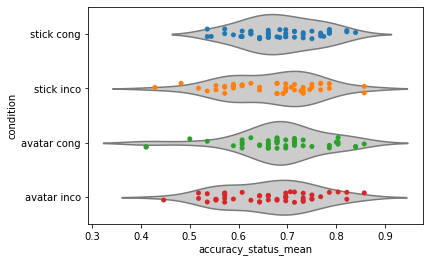

In [ ]:
ax = sns.violinplot(x=stat_to_display, y="condition", data=df,
                    inner=None, color=".8")
ax = sns.stripplot(x=stat_to_display, y="condition", data=df)

In [ ]:
#cond: 0 = stick congruent; 1 = stick incongruent
#      2 = avatar congruent; 3 = avatar incongruent

#stats: 0 = reaction time mean loc; 1 = reaction time std loc;
#       2 = reaction time mean stat; 3 = reaction time std stat;
#       4 = accuracy location mean; 5 = accuracy location std; 
#       6 = accuracy status mean; 7 = accuracy status std;

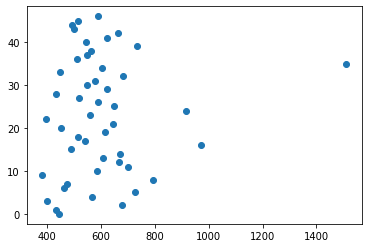

In [ ]:
val = np.array(sub2cond2stats)[:, 1, 0]
plt.scatter(val, np.arange(len(subjects)))
plt.show()

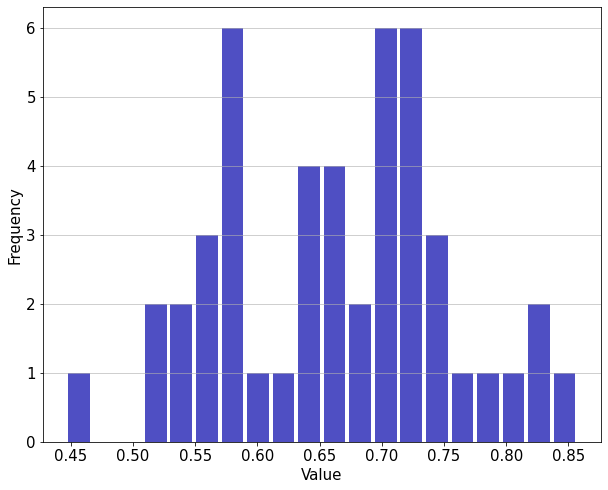

In [ ]:
#cond, stats
val = np.array(sub2cond2stats)[:, 3, 6]

plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=val, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

In [ ]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(np.array(sub2cond2stats)[:, 0, 0], np.array(sub2cond2stats)[:, 1, 0]\
                                , np.array(sub2cond2stats)[:, 2, 0], np.array(sub2cond2stats)[:, 3, 0])
print(fvalue, pvalue)

0.3142775789099056 0.8150467256132878


In [ ]:
reaction_time = mat['trialinfo'][:, 14] - mat['trialinfo'][:, 13] #status response time - status question
print(np.mean(reaction_time))
print(np.std(reaction_time))

595.2410714285714
211.65868099775446


In [ ]:
loc_accuracy = mat['trialinfo'][:, 15] 
print(np.mean(loc_accuracy))
print(np.std(loc_accuracy))

0.9375
0.24206145913796356


In [ ]:
status_accuracy = mat['trialinfo'][:, 16]
print(np.mean(status_accuracy))
print(np.std(status_accuracy))

0.6741071428571429
0.46870748106481347


In [ ]:
stats = ["reaction_time_avg", "reaction_time_std", "loc_acc_avg", "loc_acc_std",\
         "status_acc_avg", "status_acc_std"]
subs = [[], [], [], [], [], []]

stats2subs1 = dict(zip(stats, subs))
stats2subs2 = dict(zip(stats, subs))
stats2subs3 = dict(zip(stats, subs))
stats2subs4 = dict(zip(stats, subs))

cond2stats2sub = {'1': stats2subs1, "2": stats2subs2,  
                  "3": stats2subs3, "4": stats2subs4}